In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Pandas Review

## Load `Titanic.csv`

In [4]:
titanic_df = pd.read_csv('sources/titanic.csv')

## Inspect the Data


### Look at the data

In [10]:
titanic_df.head()

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


### Print your columns and corresponding data types

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 10 columns):
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
gender       1313 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 61.6+ KB


### Print all columns as a list

In [14]:
titanic_df.columns

Index(['pclass', 'survived', 'name', 'age', 'embarked', 'home.dest', 'room',
       'ticket', 'boat', 'gender'],
      dtype='object')

### Print the shape of your dataframe

In [11]:
titanic_df.shape

(1313, 10)

### Visualize the distribution of classes 

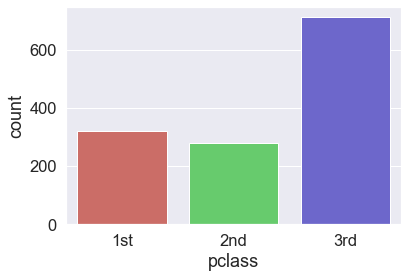

In [17]:
sns.set(font_scale = 1.5)
countplot = sns.countplot(x='pclass', data=titanic_df, palette='hls')

### Group by `pclass` and take the mean

In [19]:
titanic_df.groupby('pclass').mean()

,survived,age
pclass,,
1st,0.599379,39.667773
2nd,0.425000,28.300314
3rd,0.192686,24.519658


### Explore unique Values in the `room` and `ticket` fields

In [25]:
titanic_df.room.value_counts().head()

F-33     4
E-101    3
C26      3
C-101    3
C-125    2
Name: room, dtype: int64

In [26]:
titanic_df.ticket.unique()

array(['24160 L221', nan, '13502 L77', '17754 L224 10s 6d',
       '17477 L69 6s', ' ', '17591 L50 9s 11d', '17610 L27 15s 5d',
       '17755 L512 6s', '11755 L39 12s', '17485 L56 18s 7d',
       '113780 L28 10s', '17582 L153 9s 3d', '17593 L56 18s 7d',
       '36973 L83 9s 6d', '111361 L57 19s 7d', '112058 Complimentary',
       '17604 L39 12s', '17613 L27 14s 5d', '17608 L262 7s 6d',
       '17483 L221 15s 7d', '17754', '17483', '17608', '17485', '112058',
       '17593', '112059', '230136 L39', '248698 L13', '27849',
       '28220 L32 10s', '229236 L13', '248749 L13', '13529 L26 5s',
       '230080 L26', '250647', '34218 L10 10s', '248744 L13', 'L15 1s',
       '7076', '392091'], dtype=object)

### Create a series from the `name` column in the titanic df

In [28]:
titanic_df.name.head()

0                       Allen, Miss Elisabeth Walton
1                        Allison, Miss Helen Loraine
2                Allison, Mr Hudson Joshua Creighton
3    Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)
4                      Allison, Master Hudson Trevor
Name: name, dtype: object

### Exercise: How to bin a numeric series to 10 groups of equal size?

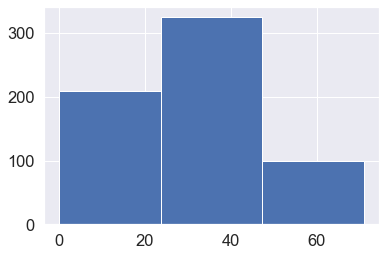

In [47]:
titanic_df.age.hist(bins=3)

In [41]:
agegroups = titanic_df.age

In [39]:
pd.cut(agegroups, bins=3).value_counts()

(23.778, 47.389]    325
(0.0959, 23.778]    209
(47.389, 71.0]       99
Name: age, dtype: int64

In [40]:
pd.cut(agegroups, bins=3, labels= ['young','middle_age','old']).value_counts()

middle_age    325
young         209
old            99
Name: age, dtype: int64

In [33]:
# will have equall bins
titanic_df['age_bin'] = pd.cut(agegroups, bins=3, labels= ['young','middle_age','old'])

# based on number of observations, can have unequal bins
titanic_df['age_quantile'] = pd.qcut(agegroups, q=3, labels= ['young','middle_age','old'])
titanic_df.head(10)

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,age_bin,age_quantile
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,middle_age,middle_age
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,young,young
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,middle_age,middle_age
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,middle_age,middle_age
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,young,young
5,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male,middle_age,old
6,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female,old,old
7,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male,middle_age,old
8,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female,old,old
9,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male,old,old


## Working with dataframes (append, merge, concentrate, reshape)
Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Step I. Split the data

### Split the data horizontally

In [49]:
titanic_horz1 = titanic_df[10:30]
titanic_horz2 = titanic_df[:10]

### Split the data Vertically - get ['pclass', 'survived', 'name'] into one list and ['age', 'embarked', 'home.dest'] to another

In [52]:
titanic_vert1 = titanic_df[['pclass','survived','name']]

In [79]:
# loc [rowstart:rowend, columnstart:columnend]
# loc [rowstart:rowend:skiprowsafterstart, columnstart:columnend:skipcolumnsafterstart]
# if rowstart is blank, starts at beginning

titanic_vert2 = titanic_df.loc[:,'pclass':'name']
titanic_vert3 = titanic_df.loc[:,'name':'home.dest']
titanic_vert4 = titanic_df.loc[:,'name':'home.dest':2]

In [85]:
titanic_vert1.head()

,pclass,survived,name
0,1st,1,"Allen, Miss Elisabeth Walton"
1,1st,0,"Allison, Miss Helen Loraine"
2,1st,0,"Allison, Mr Hudson Joshua Creighton"
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)"
4,1st,1,"Allison, Master Hudson Trevor"


### Practice: Slice titanic data set from `pclass` to the end, skipping a column in between 

In [68]:
titanic_df.head(1)

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,age_bin,age_quantile
0,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,middle_age,middle_age


In [67]:
titanic_vert5 = titanic_df.loc[:,::2]
titanic_vert5.head()

,pclass,name,embarked,room,boat,age_bin
0,1st,"Allen, Miss Elisabeth Walton",Southampton,B-5,2,middle_age
1,1st,"Allison, Miss Helen Loraine",Southampton,C26,NaN,young
2,1st,"Allison, Mr Hudson Joshua Creighton",Southampton,C26,-135,middle_age
3,1st,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",Southampton,C26,NaN,middle_age
4,1st,"Allison, Master Hudson Trevor",Southampton,C22,11,young


### Step II. Compbine the data

##### Concentrate Horizontally 

<img src="concat1.png" style="width: 400px;">

###  Combine `titanic_hor1` and `titanic_hor2` horizontally as shown in the image above

#### Use `Concat`

In [72]:
frames = [titanic_horz1, titanic_horz2]
res_concat_horz = pd.concat(frames)
# res_concat_horz

#### Use `Append`

In [70]:
res_append_horz = titanic_horz1.append(titanic_horz2)
# res_append_horz

##### Concentrate Vertically 

<img src="concat2.png" style="width: 400px;">

### Concentrate `titanic_vert1` and `titanic_vert2` vertically 

#### Use `concat`

In [84]:
res_concat_vert = pd.concat([titanic_vert1, titanic_vert2], axis=1)
# res_concat_vert

#### Use `Merge` to combine  `titanic_hor1` and `titanic_vert1` on `name`

In [83]:
res_merge_vert = pd.merge (titanic_vert1, titanic_vert2, on='name')
# res_merge_vert

#### Merge `titanic_hor1` and `titanic_vert1` on `name` so all rows in `titanic_vert1` are included

#### Check if the resulted dataset has duplicated values

## Delete a few columns from the df

In [1]:
#use drop function



# Working with Categorical Data 

### Convert female to 1, male to 0 in the gender field

In [2]:
# specify what 1 stands for


### Replace values in the `pclass` column with a numerical scale

# Introduction to Statistics 

## Mean, Median & Mode

##### Mean = add all data points and divide by the number of data points
Compute the mean age of the passengers on board

 
##### Mode = most frequent number
Find the mode of the age distribution

In [4]:
from statistics import mode
data1 = (2, 3, 3, 4, 5, 5, 5, 5, 6, 6, 6, 7) 
data2 = (-1, -2, -2, -2, -7, -7, -9) 
data3 = (-1, -2, -2, -2, -7, -7,-7, -9) 

##### Median = order all data points and pick out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers)
Find the median age of the passengers on board

In [3]:
from statistics import median
data1 = (2, 3, 3, 4, 5, 5, 5, 5, 6, 6, 6, 7) 



## Average of Averages
Compute the average survival rate (mean of the survived column)

Now compute the average survival rates of the male and female 1st, 2nd, and 3rd class passengers (six groups in total)

Compute the average of these six averages. Is it the same as the the overall average?

### Why is it different and what is the right way to calculate the Average of averages?

#### Let's start all over again. How do we calculate the mean? add up all the numbers, then divide by how many numbers there are.
 $$mean = \frac{\sum_{i=1}^N x_i}{N}$$
 
#### Calculate the mean of `survived` column

#### How to calculate the mean of one particular group: sum all elements in this group and divide by the total number of elements in this group.

$$mean_k = \frac{\sum_{i=1}^{N_k} x_{ki}}{N_k}$$

is the mean of group $k$, where $x_{ki}$ is value $i$ of group $k$ and $N_k$ is the number of values in group $k$, and


#### Calculate the survival rate of first class male

Next: how the overall mean relates to the mean of every group:
        $$N = \sum_{i=1}^M N_k$$
relates the total number of values $N$ to the number of values in each of the $M$ groups.

#### Based on things we just discussed try to derive a formula that computes $mean$ using only $mean_k$, the $N_k$, and $N$. 


The key step is multiplying each $mean_k$ by $N_k$ to get the sum of all values in that group 

$$mean_k * N_k = \frac{\sum_{i=1}^{N_k} xk_i}{N_k} * N_k = \sum_{i=1}^{N_k} xk_i$$

If we add these sums for each group, we get the sum of all elements:

$$\sum_{k=1}^M ( mean_k * N_k ) = \sum_{k=1}^M ( \sum_{i=1}^{N_k} xk_i ) = \sum_{i=1}^N x_i$$

The resulting formula is:

$$\frac{\sum_{k=1}^M ( mean_k * N_k )}{N} = \frac{\sum_{i=1}^N x_i}{N} = mean$$

In other words:
Multiply the size of each group by the average of each group, add all this together, then divide by total passengers
to recover overall mean



## Standardization vs Normalization

### Normalizing - means to scale a variable to have values between 0 and 1
#### Normalize the age column in the data set

### Standardizing  - transforms data to have a mean of zero and a standard deviation of 1


#### Plot the distribution of `pclass_replaced` and `age` columns